## Implementation of the cylindrical capsid

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root, root_scalar

In [2]:
k_B=1.380e-2       # e-21JK^-1
T=310               #K
Rout = 47 #22.03 19.4     #nm
h = 37.9            #nm
ksi_p = 0.5*50          #nm
L = 3*6.584e3       #nm
root3 = np.sqrt(3)
F0 = 2.7e5          #pN/nm^2
c0 = 0.27           #nm
EPS = 1e-30

def eq_ds_cyl(ds, percent):
    a = ksi_p * k_B * T / (Rout*Rout * ds * ds)
    b = ds*ds*root3 * L * percent / (2*np.pi*h*Rout*Rout)
    c = 1 - b
    d = np.log(c+EPS) / b
    e = F0*root3*np.exp(-ds/c0)
    return a*(1/c + d) - e

def F_cyl(ds, percent):
    a = ksi_p * k_B * T / (2*Rout*Rout)
    b = 1 - ds*ds*root3 * L * percent / (2*np.pi*h*Rout*Rout)
    c = F0*(c0*c0 + c0*ds)*np.exp(-ds/c0)
    return a/b + c

def Rho_cyl(ds):
    return (ds*ds*root3*L)/(2*np.pi*Rout*Rout*h)

/var/folders/jk/fwlqxg255f12b5_dyr_f4_6w0000gn/T/ipykernel_10621/2139984541.py:16: RuntimeWarning: invalid value encountered in log
  d = np.log(c+EPS) / b


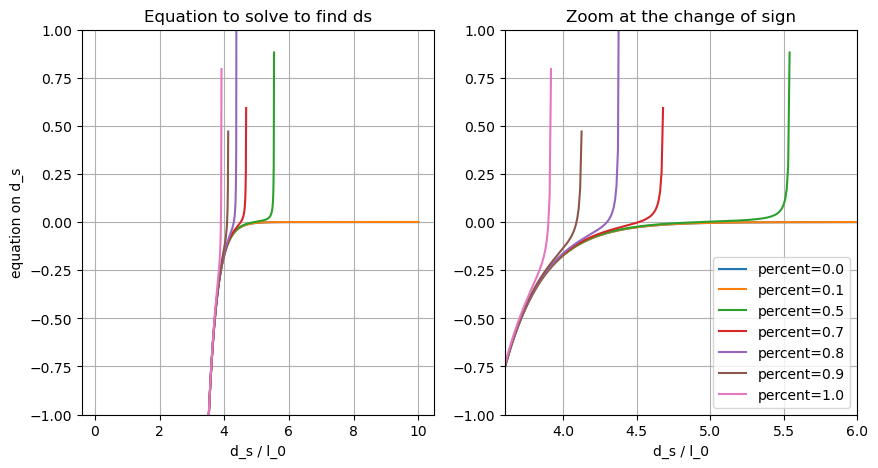

In [3]:
# Draw the functions:
plt.figure(figsize=(10,5))
x=np.linspace(0.1,10.,1000)
ax = plt.subplot(1,2,1)
ax.grid('on')
plt.xlabel('d_s / l_0')
plt.ylabel('equation on d_s')
plt.title('Equation to solve to find ds')
plt.ylim(-1,1)

ax2=plt.subplot(1,2,2)
plt.xlabel('d_s / l_0')
plt.title('Zoom at the change of sign')


for i in [0.01,0.1,0.5,0.7,0.8, 0.9,1.]:
    y = eq_ds_cyl(x,i)
    ax.plot(x,y)
    ax2.plot(x,y,label='percent=%.1f'%(i))
    ax2.legend()

plt.xlim(3.6,6.)
plt.ylim(-1,1)
plt.grid('on')


In [4]:
Force_data = np.array([-0.489977728,
-0.445434298,
-0.08908686,
0,
-0.04454343,
-0.08908686,
-0.08908686,
-0.04454343,
0.356347439,
0.757238307,
1.069042316,
1.336302895,
1.425389755,
1.781737194,
2.449888641,
3.118040089,
3.608017817,
4.632516704,
5.879732739,
7.305122494,
8.55233853,
9.665924276,
11.09131403,
12.96213808,
15.76837416,
17.9064588,
19.73273942,
21.3363029,
22.49443207,
23.8752784,
25.65701559,
27.92873051,
30.46770601,
33.27394209,
36.79287305,
39.59910913,
41.95991091,
43.65256125,
45.16703786,
46.59242762,
47.75055679,
48.64142539,
49.62138085])

percent_data = np.array([30.31694993,
31.97060175,
33.44051447,
35.18603583,
36.7478181,
38.40146991,
40.51446945,
42.25999081,
43.86770785,
45.4754249,
47.12907671,
48.69085898,
50.34451079,
51.95222784,
53.55994488,
55.16766192,
56.77537896,
58.383096,
60.03674782,
61.64446486,
63.29811667,
64.85989894,
66.51355076,
68.1212678,
69.72898484,
71.38263666,
73.03628847,
74.59807074,
76.25172255,
77.81350482,
79.42122186,
81.07487368,
82.72852549,
84.33624254,
85.8980248,
87.55167662,
89.15939366,
90.7671107,
92.42076252,
93.98254479,
95.6361966,
97.28984842,
98.89756546]) / 100

print(Force_data.shape, percent_data.shape)

(43,) (43,)


/var/folders/jk/fwlqxg255f12b5_dyr_f4_6w0000gn/T/ipykernel_10621/2139984541.py:16: RuntimeWarning: invalid value encountered in log
  d = np.log(c+EPS) / b


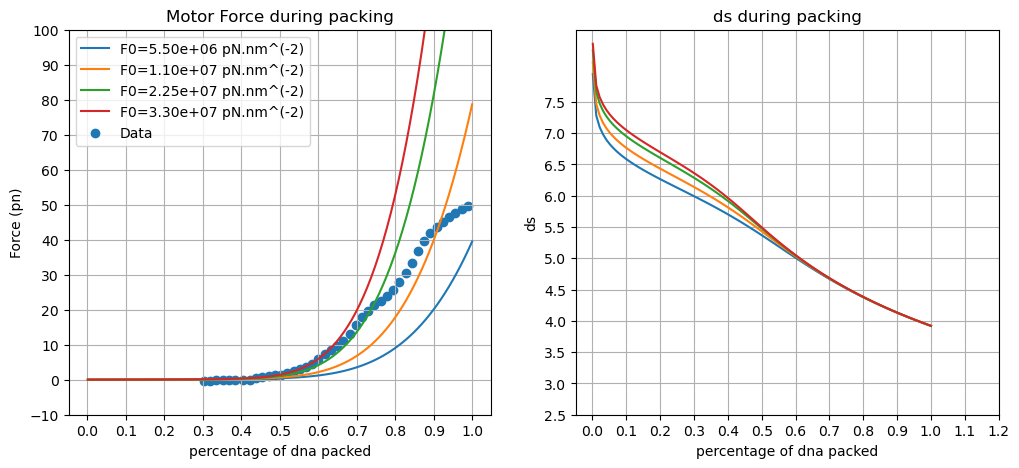

In [5]:
# let us compute the shape of the force during the packing
plt.figure(figsize=(12,5))
for F0 in [55e5, 2*55e5, 4.1*55e5, 6*55e5]:
    percent = np.linspace(0.001,1.,100)
    ds = np.zeros(percent.shape)
    for i,p in enumerate(percent):
        sol = root(eq_ds_cyl,0.5,method='lm', args=(p))
        ds[i] = sol.x[0]

    F = np.zeros(percent.shape)
    for i,p in enumerate(percent):
        F[i] = F_cyl(ds[i],percent[i])

    ax = plt.subplot(1,2,1)
    ax.plot(percent,F, label='F0=%.2e pN.nm^(-2)'%(F0))
    plt.title('Motor Force during packing')
    plt.xlabel('percentage of dna packed')
    plt.ylabel('Force (pn)')
    plt.grid('on')
    plt.xticks(np.linspace(0.,1.2,13));
    plt.yticks(np.linspace(-10,100,12))

    plt.legend()
    plt.ylim(-10,100)

    ax2 = plt.subplot(1,2,2)
    plt.plot(percent, ds)
    #plt.ylim(2.5,7.5)
    plt.title('ds during packing')
    plt.xlabel('percentage of dna packed')
    plt.ylabel('ds')
    plt.grid('on')
    plt.xticks(np.linspace(0.,1.2,13));
    plt.yticks(np.linspace(2.5,7.5,11));

ax = plt.subplot(1,2,1)
ax.scatter(percent_data, Force_data, label='Data')
plt.legend()

/var/folders/jk/fwlqxg255f12b5_dyr_f4_6w0000gn/T/ipykernel_10621/2139984541.py:16: RuntimeWarning: invalid value encountered in log
  d = np.log(c+EPS) / b


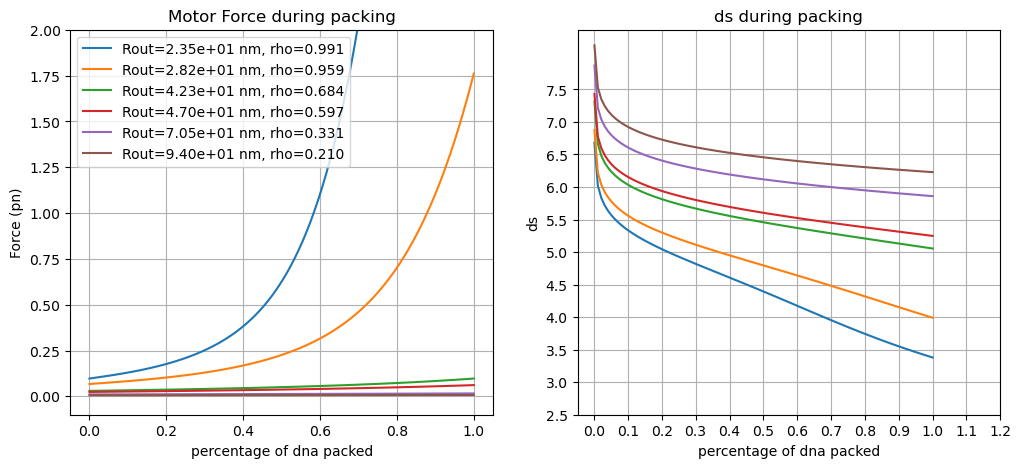

In [6]:
# Plots for differnt values of Rout
k_B=1.380e-2       # e-21JK^-1
T=310               #K
Rout = 47 #22.03 19.4     #nm
h = 37.9            #nm
ksi_p = 0.5*50          #nm
L = 6.584e3       #nm
root3 = np.sqrt(3)
F0 = 2.7e5          #pN/nm^2
c0 = 0.27           #nm
EPS = 1e-30

plt.figure(figsize=(12,5))
for Rout in [0.5*47, 0.6*47, 0.9*47, 47, 1.5*47, 2*47]:
    percent = np.linspace(0.001,1.,100)
    ds = np.zeros(percent.shape)
    for i,p in enumerate(percent):
        sol = root(eq_ds_cyl,0.5,method='lm', args=(p))
        ds[i] = sol.x[0]

    F = np.zeros(percent.shape)
    for i,p in enumerate(percent):
        F[i] = F_cyl(ds[i],percent[i])

    ax = plt.subplot(1,2,1)
    ax.plot(percent,F, label='Rout=%.2e nm, rho=%.3f'%(Rout, Rho_cyl(ds[-1])))
    plt.title('Motor Force during packing')
    plt.xlabel('percentage of dna packed')
    plt.ylabel('Force (pn)')
    plt.grid('on')
    #plt.xticks(np.linspace(0.,1.2,13));
    #plt.yticks(np.linspace(-10,100,12))

    plt.legend()
    plt.ylim(-.1,2)

    ax2 = plt.subplot(1,2,2)
    plt.plot(percent, ds)
    #plt.ylim(2.5,7.5)
    plt.title('ds during packing')
    plt.xlabel('percentage of dna packed')
    plt.ylabel('ds')
    plt.grid('on')
    plt.xticks(np.linspace(0.,1.2,13));
    plt.yticks(np.linspace(2.5,7.5,11));

ax = plt.subplot(1,2,1)
#ax.scatter(percent_data, Force_data, label='Data')
plt.legend()

## Implementation of the spherical capsid

In [7]:
k_B=1.380e-2       # e-21JK^-1
T=310               #K
Rout = 29. #22.03        #nm
h = 26.6            #nm
ksi_p = 50          #nm
L = 10*6.584e3         #nm
root3 = np.sqrt(3)
F0 = 2.7e5          #pN/nm^2
c0 = 0.27           #nm
EPS = 0.01

def eq_ds_sphere(ds, percent):
    Rint = Rout * ( 1 - ( (ds*ds*L * percent *root3) / (4*np.pi*Rout**3) )**(2/3))**(1/2)
    e = root3 * F0 * np.exp(-ds/c0)
    a = ksi_p * k_B * T / (Rint*Rint*ds*ds)
    b = 3 * ksi_p * ksi_p * k_B * T / (ds*ds)
    c = 1/(Rout**2 - Rint**2) + Rout/((Rout**2 - Rint**2)**(3/2)) * np.log((Rout-np.sqrt(Rout*Rout - Rint*Rint))/Rint)
    return a+b*c - e

def F_sphere(ds, percent):
    Rint = Rout * ( 1 - ( (ds*ds*L * percent *root3) / (4*np.pi*Rout**3) )**(2/3))**(1/2)
    a = ksi_p * k_B * T / (2*Rint*Rint)
    c = root3*F0*(c0*c0 + c0*ds)*np.exp(-ds/c0)
    return a + c

def Rho_sphere(ds):
    return (root3*L*ds*ds*3)/(8*np.pi*Rout**3)

/var/folders/jk/fwlqxg255f12b5_dyr_f4_6w0000gn/T/ipykernel_10621/2406307061.py:13: RuntimeWarning: invalid value encountered in sqrt
  Rint = Rout * ( 1 - ( (ds*ds*L * percent *root3) / (4*np.pi*Rout**3) )**(2/3))**(1/2)


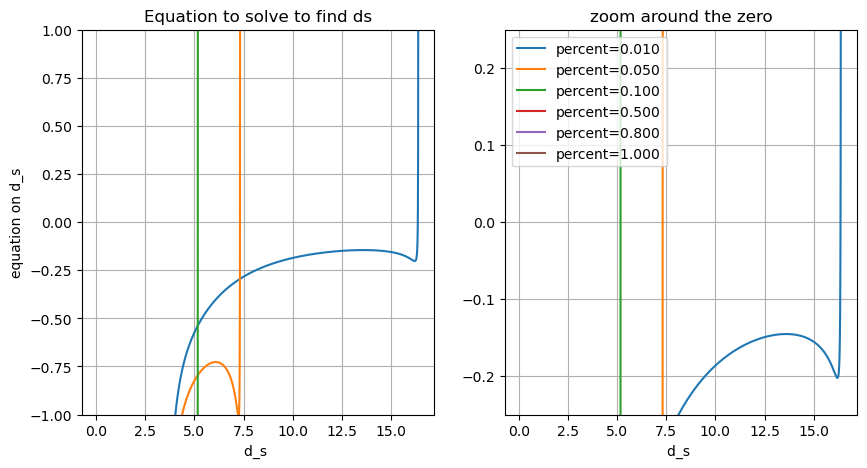

In [8]:
# Draw the equation
plt.figure(figsize=(10,5))
x=np.linspace(0.1,50,10000)
ax = plt.subplot(1,2,1)
ax.grid('on')
plt.xlabel('d_s ')
plt.ylabel('equation on d_s')
plt.title('Equation to solve to find ds')
plt.ylim(-1,1)

ax2=plt.subplot(1,2,2)
plt.xlabel('d_s ')
plt.title('zoom around the zero')

for i in [0.01,0.05,0.1,0.5,0.8,1.]:
    y = eq_ds_sphere(x,i)
    ax.plot(x,y)
    ax2.plot(x,y,label='percent=%.3f'%(i))
    ax2.legend()

plt.ylim(-.25,.25)
#plt.xlim(3,20)
plt.grid('on')

/var/folders/jk/fwlqxg255f12b5_dyr_f4_6w0000gn/T/ipykernel_10621/2406307061.py:13: RuntimeWarning: invalid value encountered in sqrt
  Rint = Rout * ( 1 - ( (ds*ds*L * percent *root3) / (4*np.pi*Rout**3) )**(2/3))**(1/2)


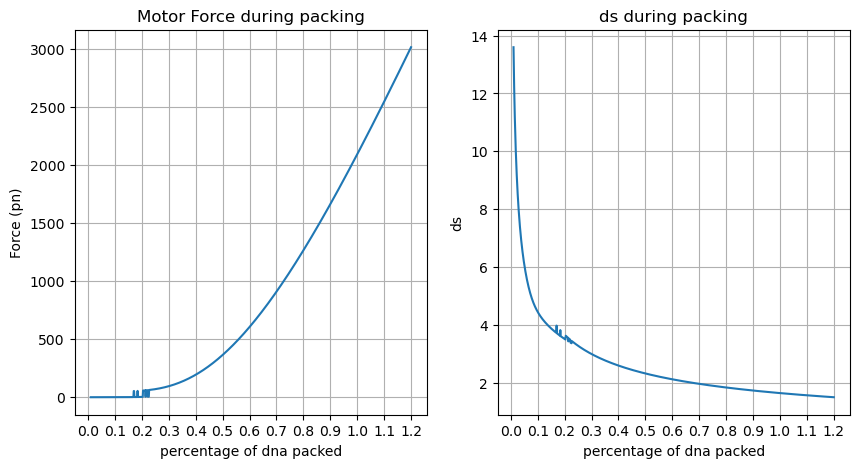

In [15]:
# F as a funciton of percent
# let us compute the shape of the force during the packing
percent = np.linspace(0.01,1.2,1000)
ds = np.zeros(percent.shape)
for i,p in enumerate(percent):
    sol = root(eq_ds_sphere,0.5,method='lm', args=(p))
    ds[i] = sol.x[0]

F = np.zeros(percent.shape)
for i,p in enumerate(percent):
    F[i] = F_sphere(ds[i],percent[i])

plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
ax.plot(percent,F)
plt.title('Motor Force during packing')
plt.xlabel('percentage of dna packed')
plt.ylabel('Force (pn)')
plt.grid('on')
plt.xticks(np.linspace(0.,1.2,13));
#plt.ylim(-10,100)

ax2 = plt.subplot(1,2,2)
plt.plot(percent, ds)
#plt.ylim(2.5,7.5)
plt.title('ds during packing')
plt.xlabel('percentage of dna packed')
plt.ylabel('ds')
plt.grid('on')
plt.xticks(np.linspace(0.,1.2,13));

/var/folders/jk/fwlqxg255f12b5_dyr_f4_6w0000gn/T/ipykernel_10621/2406307061.py:13: RuntimeWarning: invalid value encountered in sqrt
  Rint = Rout * ( 1 - ( (ds*ds*L * percent *root3) / (4*np.pi*Rout**3) )**(2/3))**(1/2)
/var/folders/jk/fwlqxg255f12b5_dyr_f4_6w0000gn/T/ipykernel_10621/1466756996.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ds[i] = sol.x


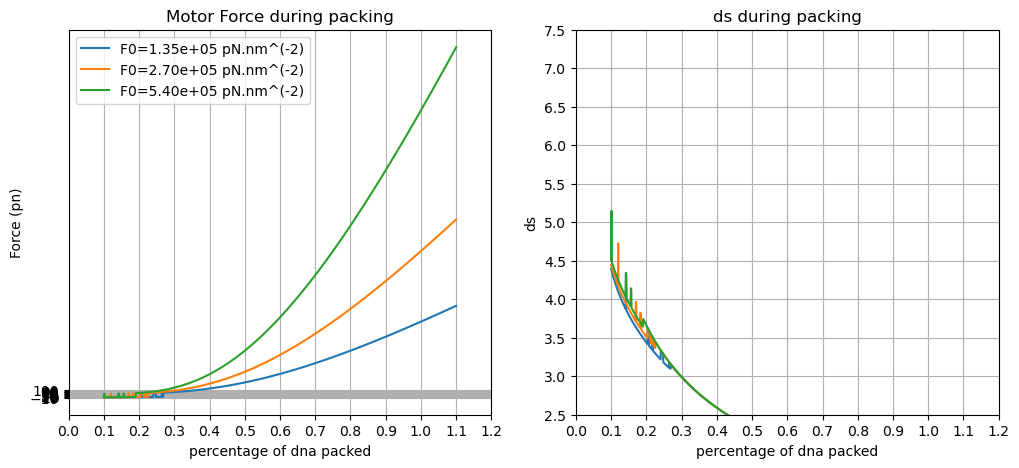

In [18]:
# let us compute the shape of the force during the packing
plt.figure(figsize=(12,5))
for F0 in [0.5*2.7e5, 2.7e5, 2*2.7e5]:
    percent = np.linspace(0.1,1.1,1000)
    ds = np.zeros(percent.shape)
    for i,p in enumerate(percent):
        sol = root(eq_ds_sphere,0.5,method='lm', args=(p))
        ds[i] = sol.x

    F = np.zeros(percent.shape)
    for i,p in enumerate(percent):
        F[i] = F_sphere(ds[i],percent[i])

    ax = plt.subplot(1,2,1)
    ax.plot(percent,F, label='F0=%.2e pN.nm^(-2)'%(F0))
    plt.title('Motor Force during packing')
    plt.xlabel('percentage of dna packed')
    plt.ylabel('Force (pn)')
    plt.grid('on')
    plt.xticks(np.linspace(0.,1.2,13));
    plt.yticks(np.linspace(-10,100,12))

    plt.legend()
    #plt.ylim(-10,100)

    ax2 = plt.subplot(1,2,2)
    plt.plot(percent, ds)
    plt.ylim(2.5,7.5)
    plt.title('ds during packing')
    plt.xlabel('percentage of dna packed')
    plt.ylabel('ds')
    plt.grid('on')
    plt.xticks(np.linspace(0.,1.2,13));
    plt.yticks(np.linspace(2.5,7.5,11));

ax = plt.subplot(1,2,1)
#ax.scatter(percent_data, Force_data, label='Data')
plt.legend()

/var/folders/jk/fwlqxg255f12b5_dyr_f4_6w0000gn/T/ipykernel_10621/2406307061.py:13: RuntimeWarning: invalid value encountered in sqrt
  Rint = Rout * ( 1 - ( (ds*ds*L * percent *root3) / (4*np.pi*Rout**3) )**(2/3))**(1/2)


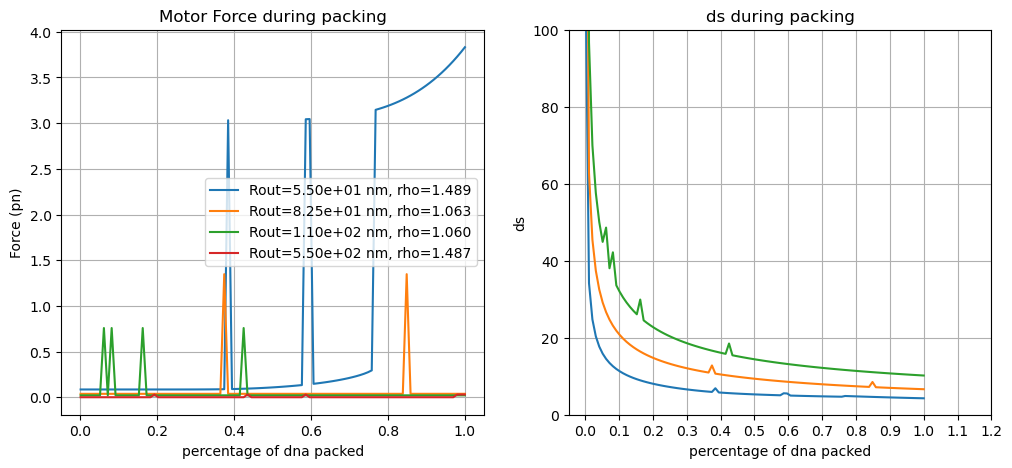

In [19]:
# Plots for differnt values of Rout
k_B=1.380e-2       # e-21JK^-1
T=310               #K
Rout = 47 #22.03 19.4   #nm
ksi_p = 0.5*50          #nm
L = 10*6.584e3       #nm
root3 = np.sqrt(3)
F0 = 2.7e5          #pN/nm^2
c0 = 0.27           #nm
EPS = 1e-30

plt.figure(figsize=(12,5))
for Rout in [55, 1.5*55, 2*55, 10*55]:
    percent = np.linspace(0.001,1.,100)
    ds = np.zeros(percent.shape)
    for i,p in enumerate(percent):
        sol = root(eq_ds_sphere,0.5,method='lm', args=(p))
        ds[i] = sol.x[0]

    F = np.zeros(percent.shape)
    for i,p in enumerate(percent):
        F[i] = F_sphere(ds[i],percent[i])

    ax = plt.subplot(1,2,1)
    ax.plot(percent,F, label='Rout=%.2e nm, rho=%.3f'%(Rout, Rho_sphere(ds[-1])))
    plt.title('Motor Force during packing')
    plt.xlabel('percentage of dna packed')
    plt.ylabel('Force (pn)')
    plt.grid('on')
    #plt.xticks(np.linspace(0.,1.2,13));
    #plt.yticks(np.linspace(-10,100,12))
    plt.legend()
    #plt.ylim(-.1,2)

    ax2 = plt.subplot(1,2,2)
    plt.plot(percent, ds)
    plt.ylim(0,100)
    plt.title('ds during packing')
    plt.xlabel('percentage of dna packed')
    plt.ylabel('ds')
    plt.grid('on')
    plt.xticks(np.linspace(0.,1.2,13));
    #plt.yticks(np.linspace(2.5,7.5,11));

ax = plt.subplot(1,2,1)
#ax.scatter(percent_data, Force_data, label='Data')
plt.legend()